### Implementation of task C 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tools.task import wrap_angle

In [3]:
ekf_input = np.load ('ekf_out/input_data.npy')
ekf_output = np.load('ekf_out/output_data.npy')

pf_input = np.load('pf_out/input_data.npy')
pf_output = np.load('pf_out/output_data.npy')

In [4]:
real_path_ekf = ekf_input['real_robot_path']
real_path_pf = pf_input['real_robot_path']

mean_path_ekf= ekf_output['mean_trajectory']
mean_path_pf = pf_output['mean_trajectory']

cov_path_ekf = ekf_output['covariance_trajectory']
cov_path_pf = pf_output['covariance_trajectory']

n_ekf_steps = ekf_input['num_steps']
n_pf_steps = pf_input['num_steps']


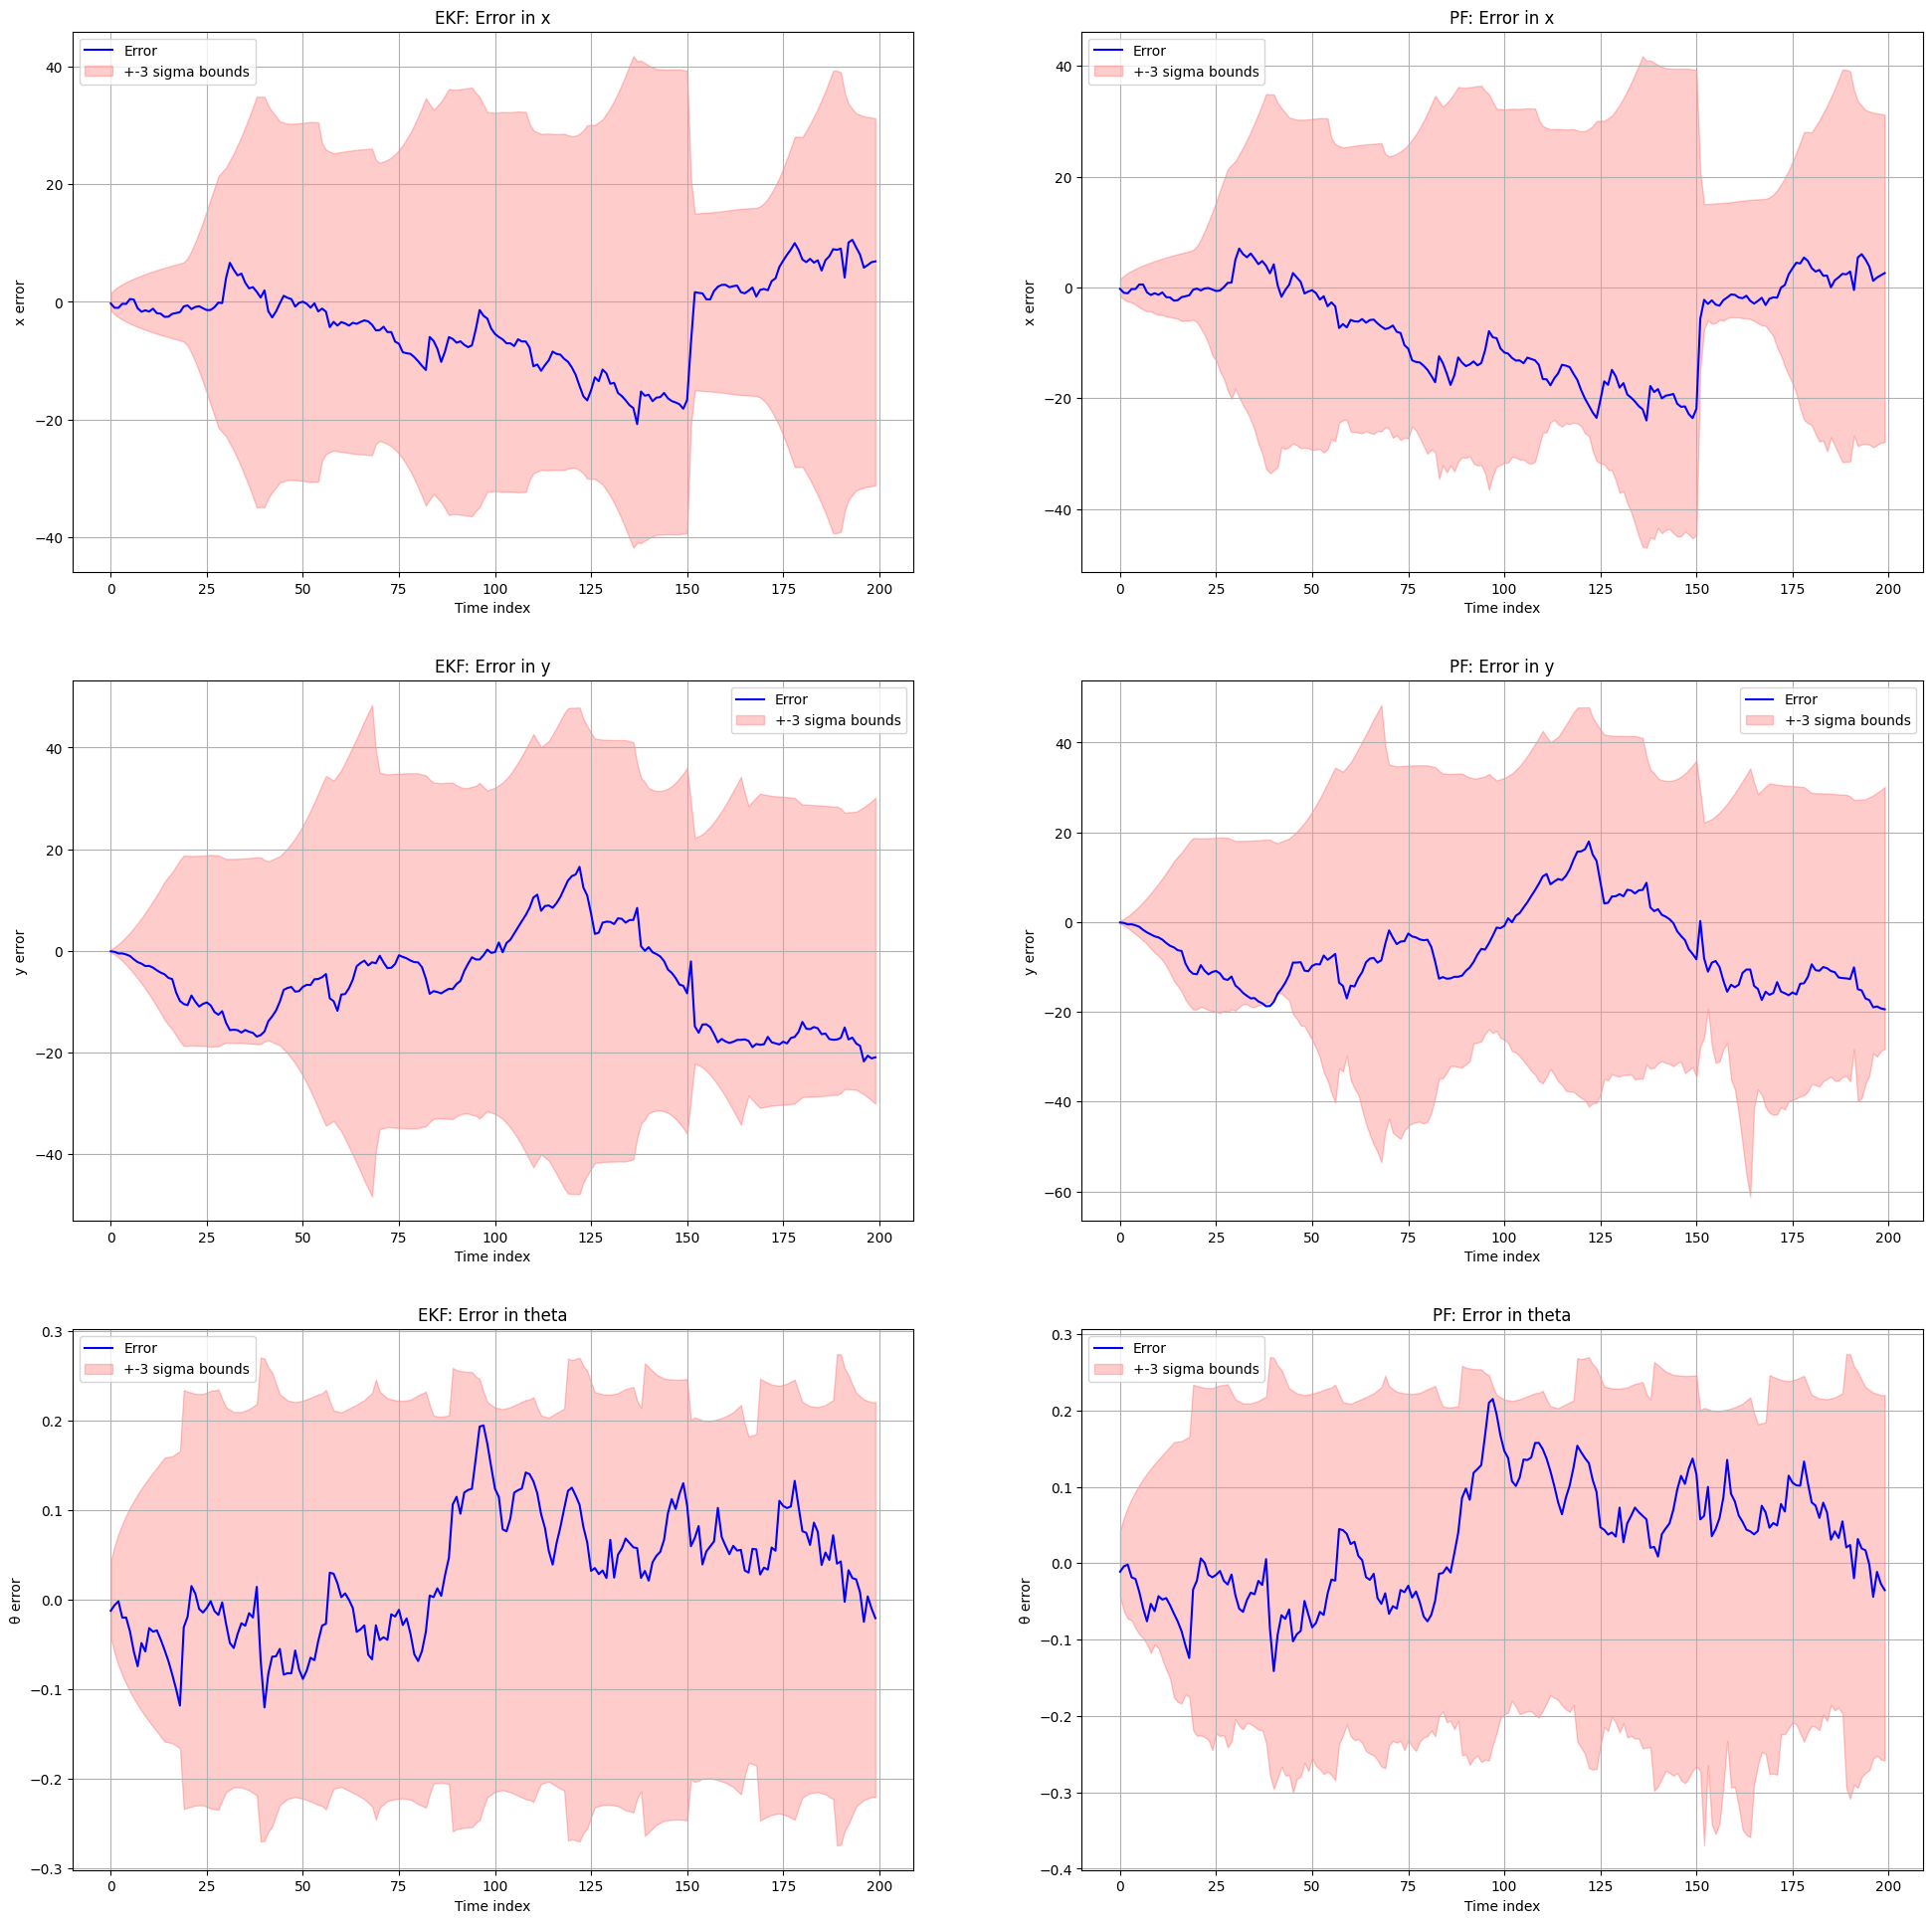

In [5]:
error_ekf = real_path_ekf - mean_path_ekf
error_pf = real_path_pf - mean_path_pf

for i in range(len(error_ekf)):
    error_ekf[i, 2] = wrap_angle(error_ekf[i, 2])

for i in range(len(error_pf)):
    error_pf[i, 2] = wrap_angle(error_pf[i, 2])

sigma_ekf = np.sqrt(np.diagonal(cov_path_ekf, axis1=0, axis2=1))
sigma_pf = np.sqrt(np.diagonal(cov_path_pf, axis1=0, axis2=1))

time_ekf = np.arange(n_ekf_steps)
time_pf = np.arange(n_pf_steps)

fig, axs = plt.subplots(3, 2, figsize=(24, 24))

titles = ['Error in x', 'Error in y', 'Error in theta']
y_labels = ['x error', 'y error', 'θ error']

for i in range(3):
    axs[i, 0].set_title(f'EKF: {titles[i]}')
    axs[i, 0].plot(time_ekf, error_ekf[:, i], color='b', label='Error')
    axs[i, 0].fill_between(time_ekf, -3 * sigma_ekf[:, i], 3 * sigma_ekf[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 0].set_xlabel('Time index')
    axs[i, 0].set_ylabel(y_labels[i])
    axs[i, 0].grid()
    axs[i, 0].legend()

    axs[i, 1].set_title(f'PF: {titles[i]}')
    axs[i, 1].plot(time_pf, error_pf[:, i], color='b', label='Error')
    axs[i, 1].fill_between(time_pf, -3 * sigma_pf[:, i], 3 * sigma_ekf[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 1].set_xlabel('Time index')
    axs[i, 1].set_ylabel(y_labels[i])
    axs[i, 1].grid()
    axs[i, 1].legend()

In [6]:
percentage_within_bounds_ekf = np.mean(np.abs(error_ekf) < 3 * sigma_ekf)
percentage_within_bounds_pf = np.mean(np.abs(error_pf) < 3 * sigma_pf)

print("Percentage of EKF trajectory within +- 3 sigma bounds:", percentage_within_bounds_ekf * 100)
print("Percentage of PF trajectory within +- 3 sigma bounds:", percentage_within_bounds_pf * 100)

Percentage of EKF trajectory within +- 3 sigma bounds: 100.0
Percentage of PF trajectory within +- 3 sigma bounds: 99.5


### Task D







### Subtask 1: Lets make the transition noise in action space smaller (Alphas are zero) and see how it affects the EKF. Also lets make the noise of the motion model smaller (Q is zero).

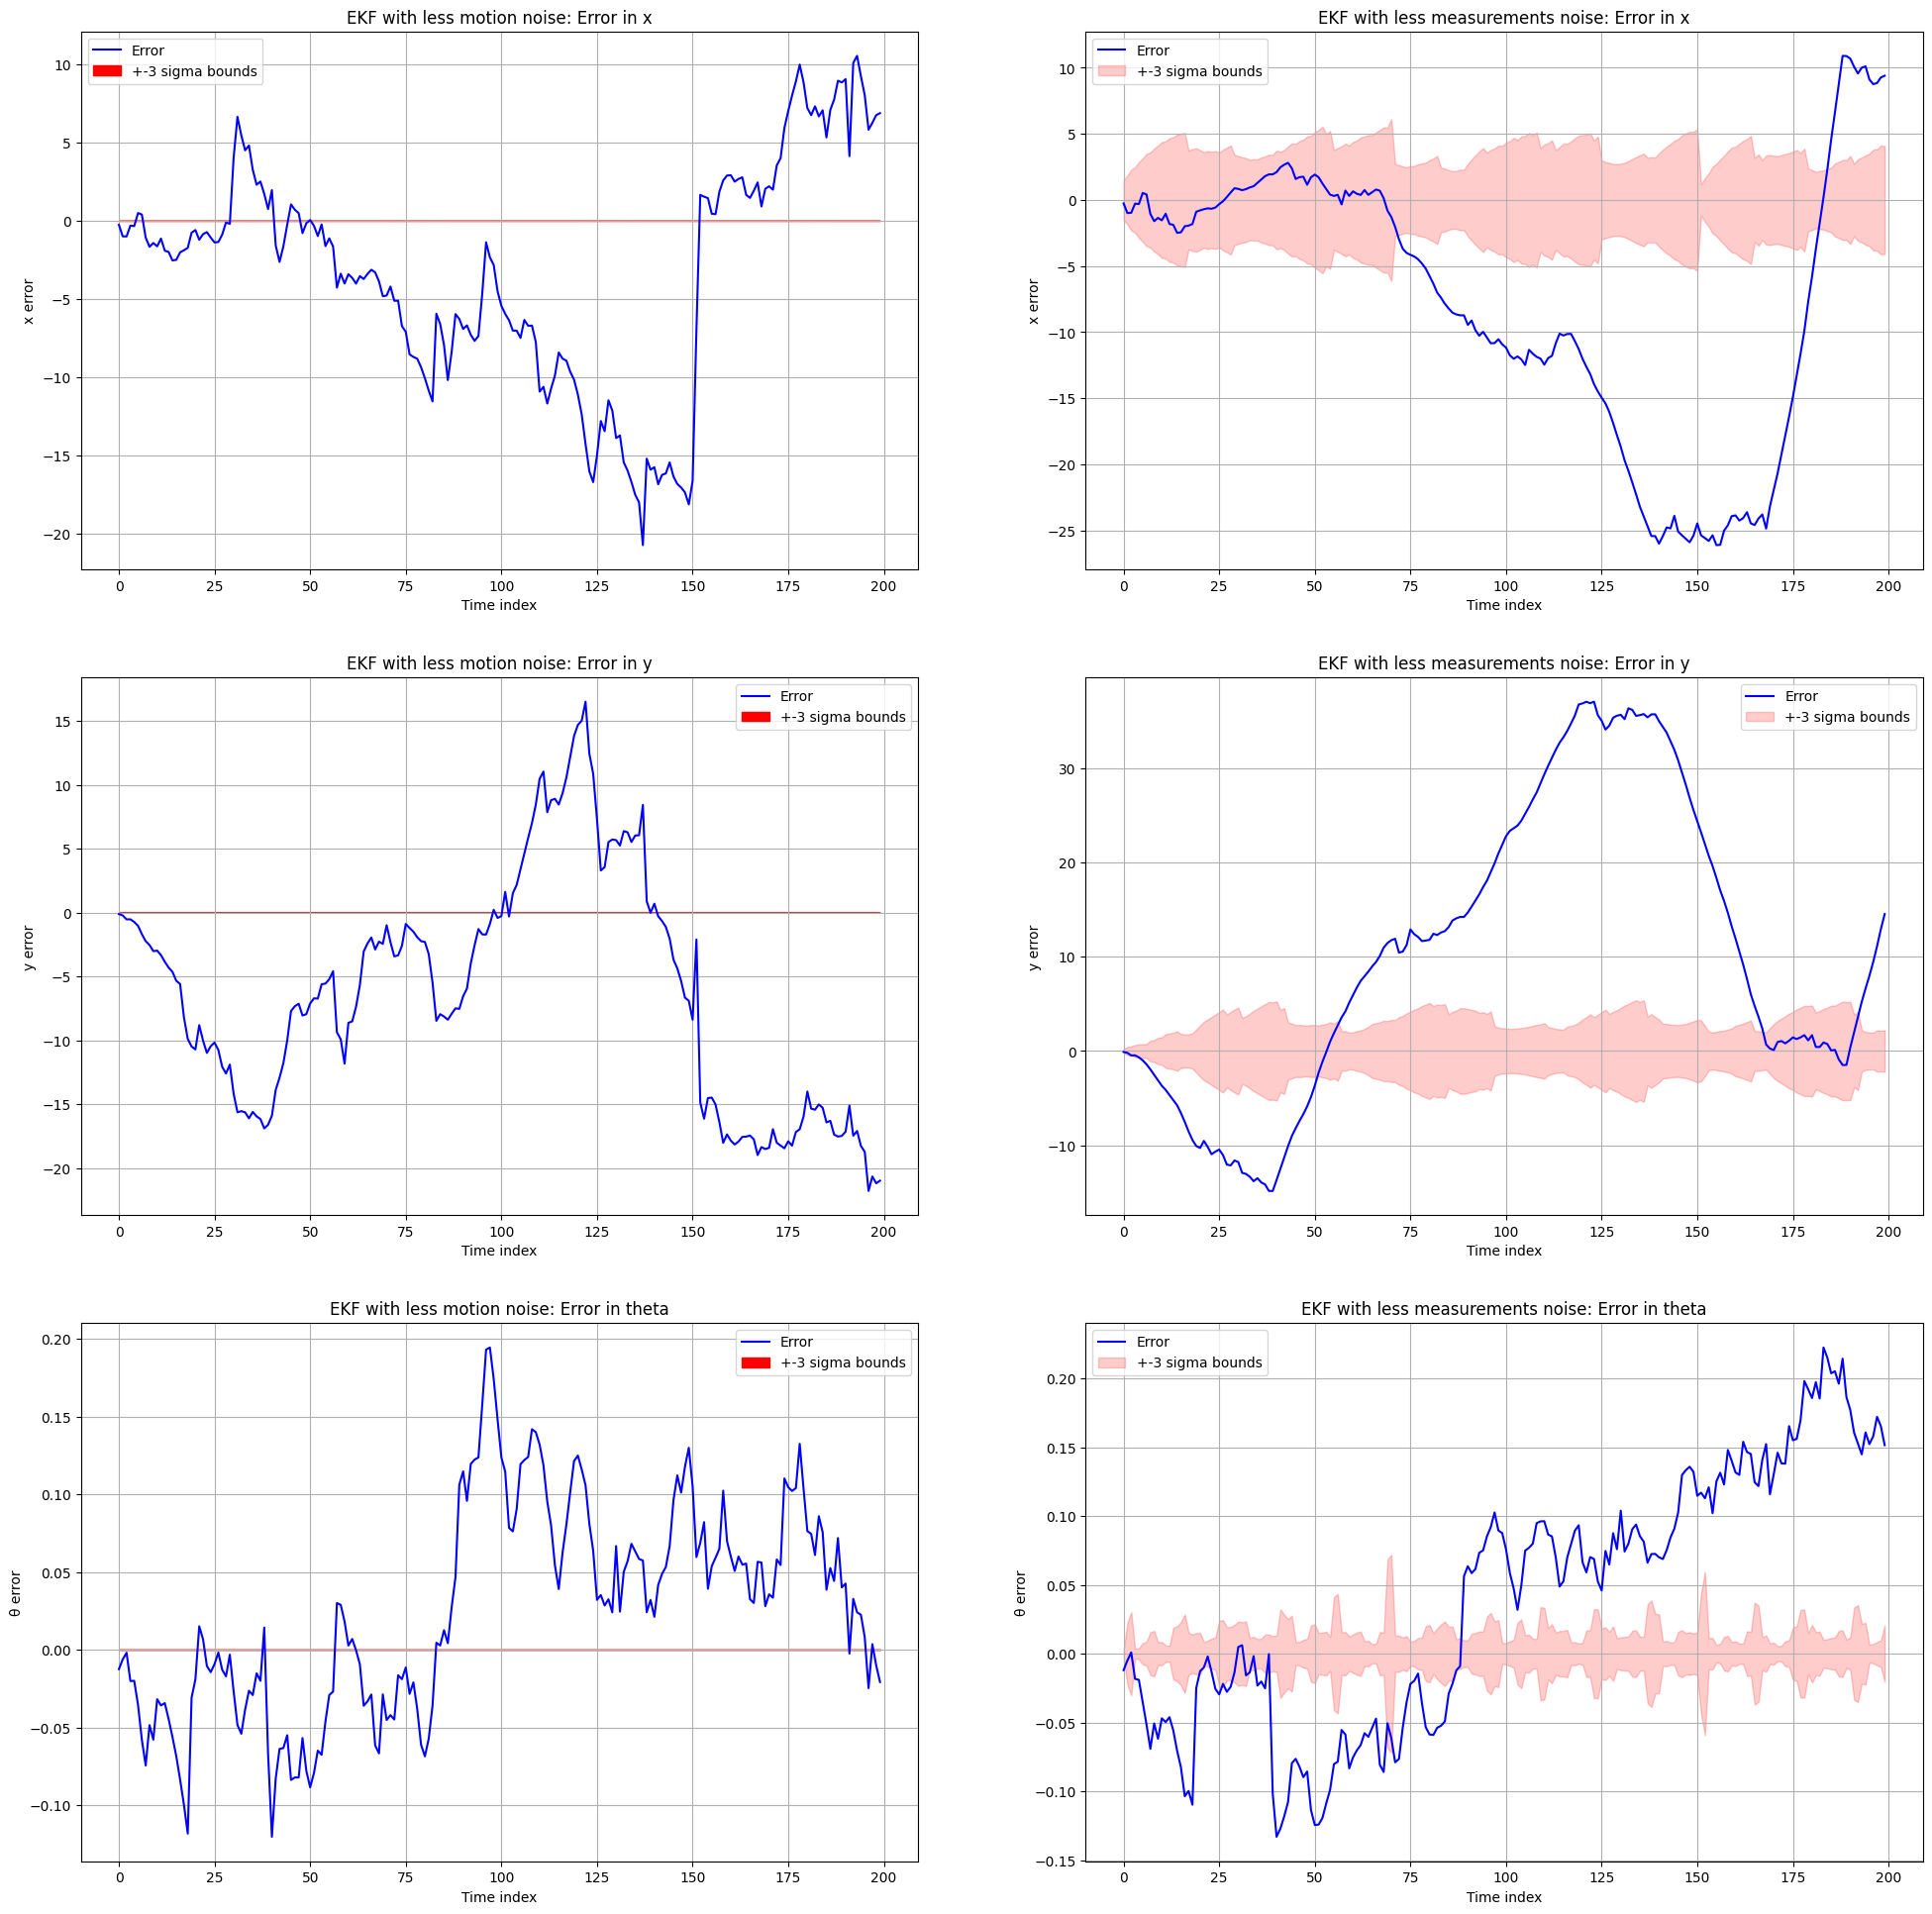

In [7]:
ekf_input = np.load ('ekf_less_noise_motion_exp/input_data.npy')
ekf_output = np.load('ekf_less_noise_motion_exp/output_data.npy')

real_path_ekf = ekf_input['real_robot_path']

mean_path_ekf= ekf_output['mean_trajectory']

cov_path_ekf = ekf_output['covariance_trajectory']

n_ekf_steps = ekf_input['num_steps']



ekf_input = np.load ('ekf_less_noise_measurements_exp/input_data.npy')
ekf_output = np.load('ekf_less_noise_measurements_exp/output_data.npy')

real_path_ekf_less_noise_measurements = ekf_input['real_robot_path']

mean_path_ekf_less_noise_measurements= ekf_output['mean_trajectory']

cov_path_ekf_less_noise_measurements = ekf_output['covariance_trajectory']

n_ekf_steps_less_noise_measurements = ekf_input['num_steps']

error_ekf_less_noise_motion = real_path_ekf - mean_path_ekf

for i in range(len(error_ekf)):
    error_ekf[i, 2] = wrap_angle(error_ekf[i, 2])

for i in range(len(error_ekf_less_noise_motion)):
    error_ekf_less_noise_motion[i, 2] = wrap_angle(error_ekf_less_noise_motion[i, 2])

sigma_ekf = np.sqrt(np.diagonal(cov_path_ekf, axis1=0, axis2=1))

time_ekf = np.arange(n_ekf_steps)

sigma_ekf_less_noise_motion = np.sqrt(np.diagonal(cov_path_ekf_less_noise_measurements, axis1=0, axis2=1))

time_ekf_less_noise_motion = np.arange(n_ekf_steps_less_noise_measurements)



fig, axs = plt.subplots(3, 2, figsize=(24, 24))

titles = ['Error in x', 'Error in y', 'Error in theta']
y_labels = ['x error', 'y error', 'θ error']

for i in range(3):
    axs[i, 0].set_title(f'EKF with less motion noise: {titles[i]}')
    axs[i, 0].plot(time_ekf, error_ekf[:, i], color='b', label='Error')
    axs[i, 0].fill_between(time_ekf, -3 * sigma_ekf[:, i], 3 * sigma_ekf[:, i], color='r', alpha=1, label='+-3 sigma bounds')
    axs[i, 0].set_xlabel('Time index')
    axs[i, 0].set_ylabel(y_labels[i])
    axs[i, 0].grid()
    axs[i, 0].legend()

    axs[i, 1].set_title(f'EKF with less measurements noise: {titles[i]}')
    axs[i, 1].plot(time_ekf, error_ekf_less_noise_motion[:, i], color='b', label='Error')
    axs[i, 1].fill_between(time_ekf_less_noise_motion, -3 * sigma_ekf_less_noise_motion[:, i], 3 * sigma_ekf_less_noise_motion[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 1].set_xlabel('Time index')
    axs[i, 1].set_ylabel(y_labels[i])
    axs[i, 1].grid()
    axs[i, 1].legend()

Thoughts: If the motion noise is reduced, the EKF predictions become more accurate, but the x and y errors remain noticeable. This may be due to the sensor noise remaining the same or the EKF not fully accounting for all the nuances of motion.

However, reducing measurement noise can improve accuracy. This is because the filter becomes more confident in its estimates (uncertainty bounds become narrower), but x and y errors remain noticeable. This may be due to the sensor noise remaining the same or the EKF not fully accounting for all the nuances of motion. Reducing measurement noise can lead to better results. Errors become more predictable, less likely to go beyond plus or minus 3 sigma, and especially the angle error, denoted by theta, is reduced. This makes sense because the EKF is corrected by measurements, and the more accurate they are, the better the filter works. However, errors in x and y still remain, perhaps due to limitations of the motion model or other factors.

So, the EKF benefits more from reducing measurement noise than from reducing motion noise, but even with minimal noise, the errors do not completely disappear.

### Subtask 2: Lets make an adjustment of number of particles in Particle Filter and see what happens

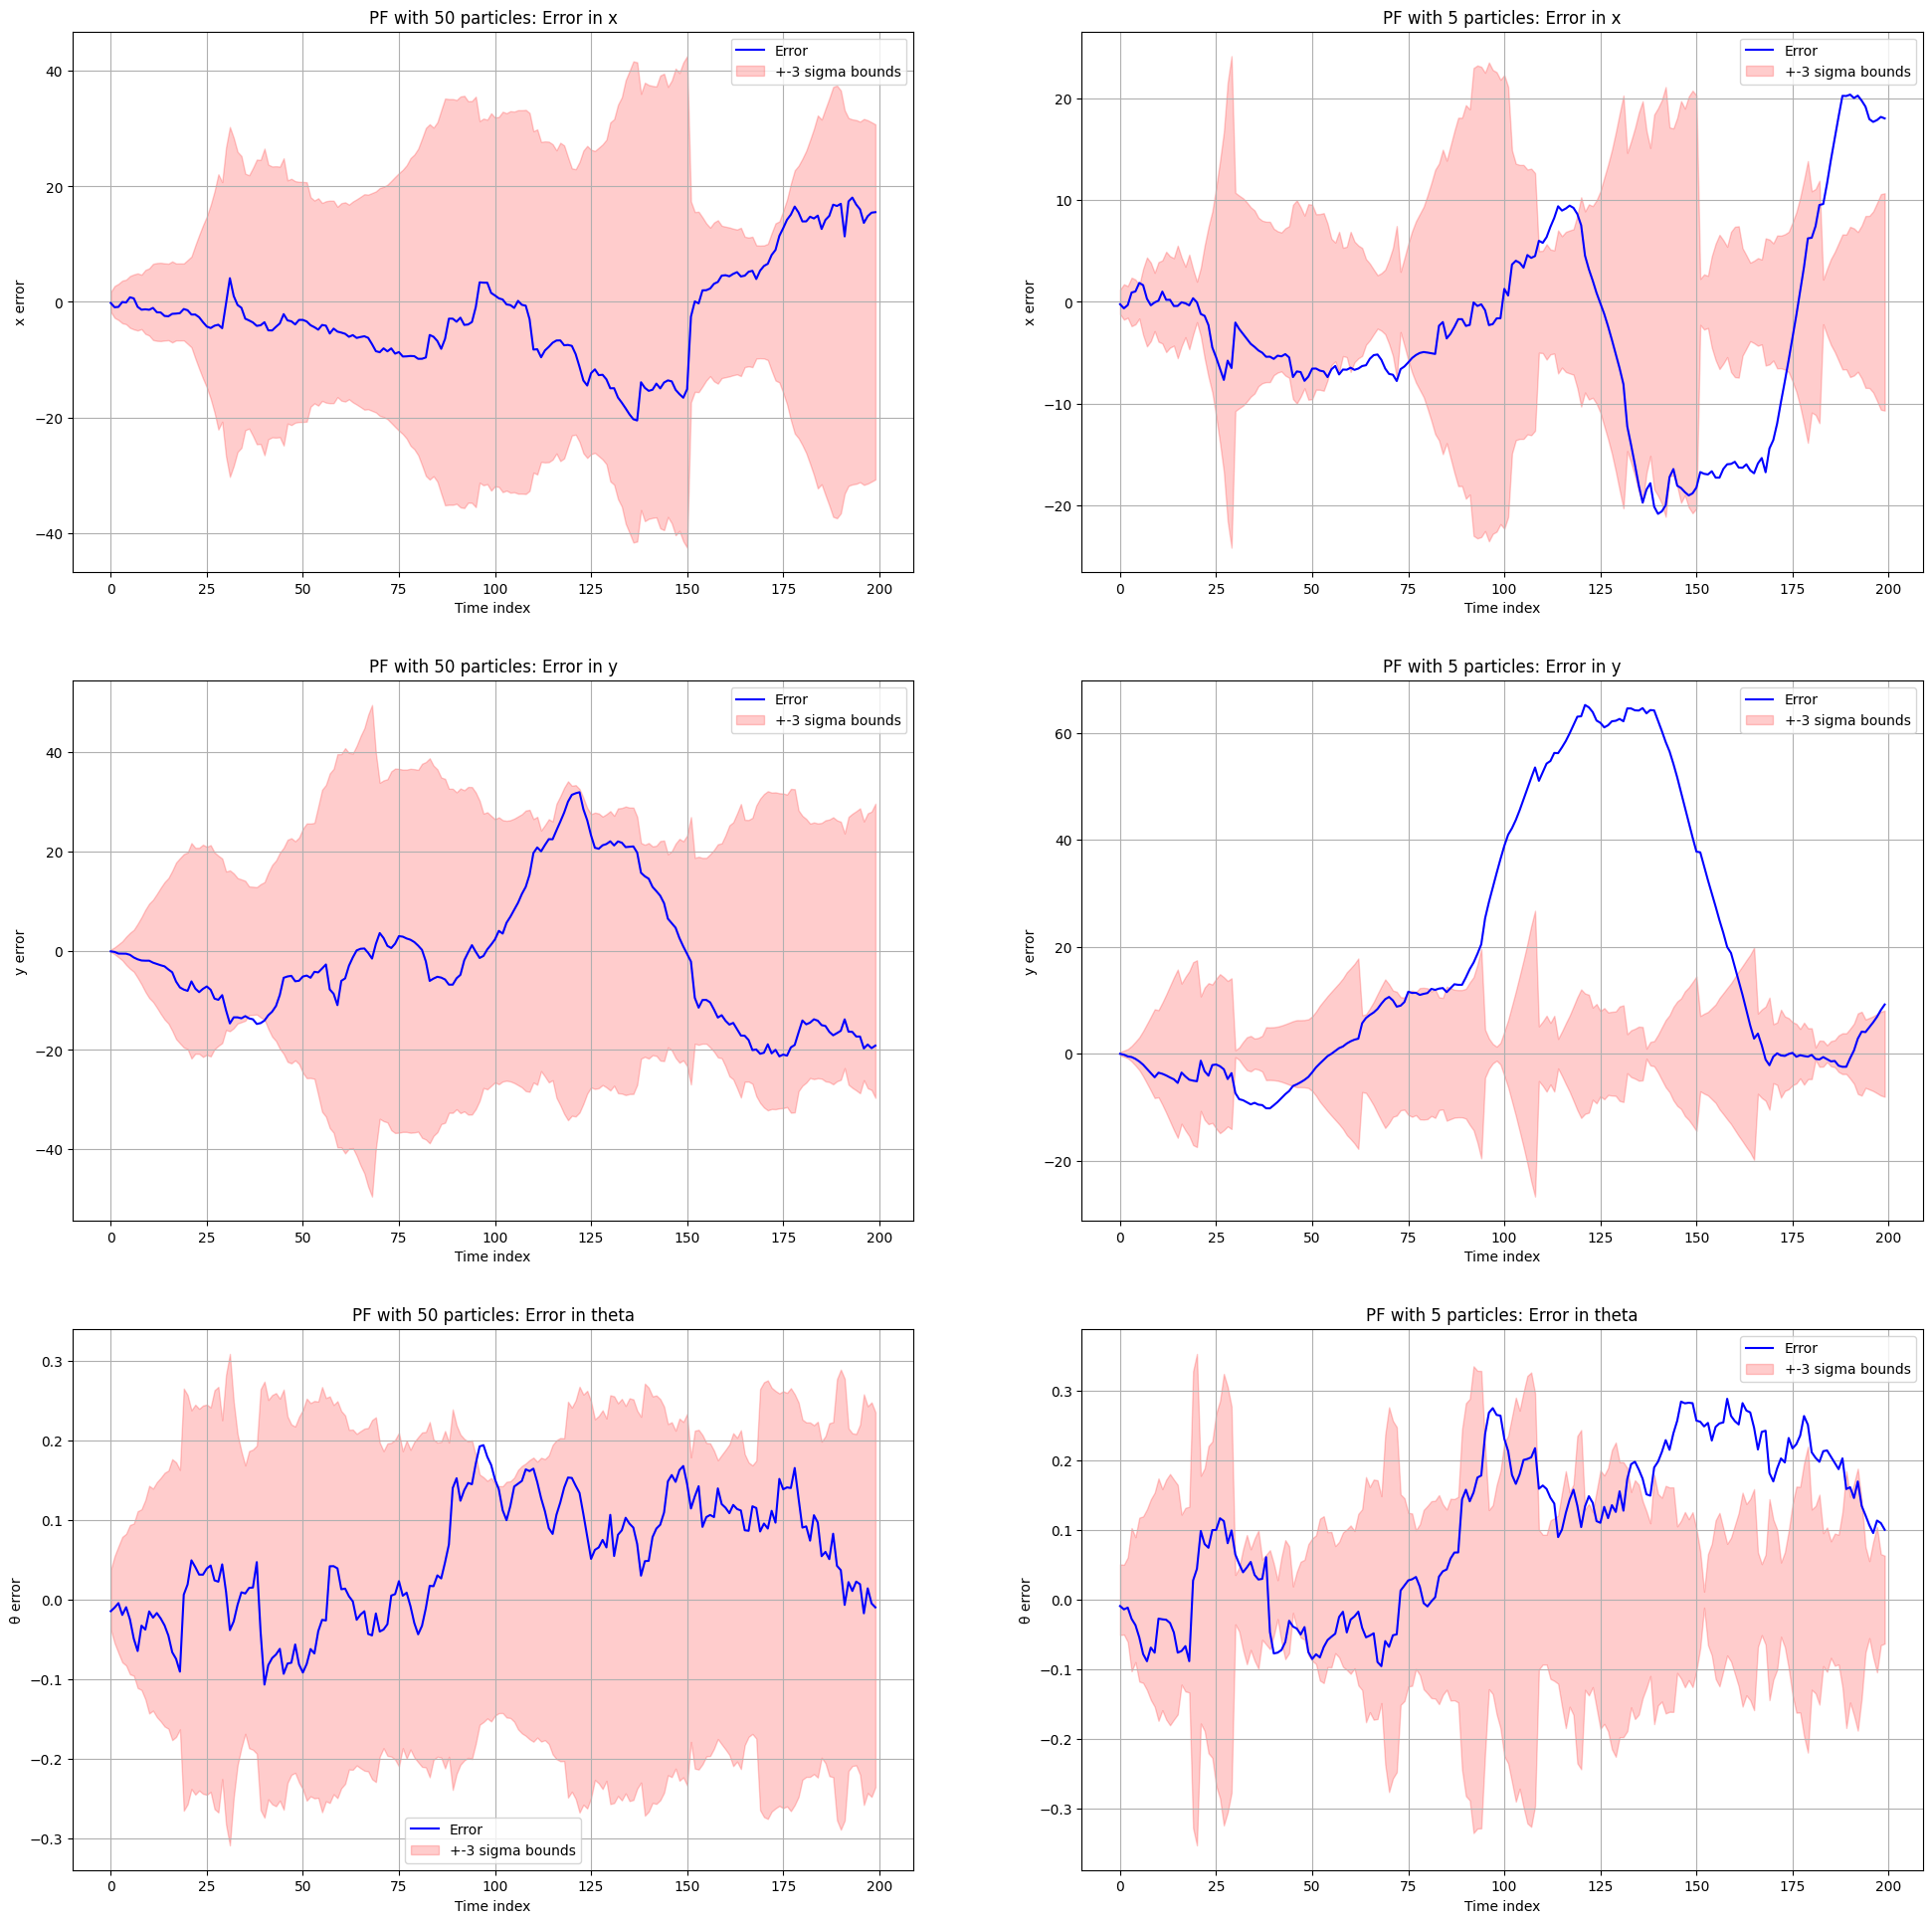

In [8]:
pf_input_50 = np.load('pf_50_particles/input_data.npy')
pf_output_50 = np.load('pf_50_particles/output_data.npy')

pf_input_5 = np.load('pf_5_particles/input_data.npy')
pf_output_5 = np.load('pf_5_particles/output_data.npy')


real_path_pf_50 = pf_input_50['real_robot_path']
real_path_pf_5 = pf_input_5['real_robot_path']

mean_path_pf_50 = pf_output_50['mean_trajectory']
mean_path_pf_5 = pf_output_5['mean_trajectory']

cov_path_pf_50 = pf_output_50['covariance_trajectory']
cov_path_pf_5 = pf_output_5['covariance_trajectory']

n_pf_steps_50 = pf_input_50['num_steps']
n_pf_steps_5 = pf_input_5['num_steps']

error_pf_50 = real_path_pf_50 - mean_path_pf_50
error_pf_5 = real_path_pf_5 - mean_path_pf_5

for i in range(len(error_pf_50)):
    error_pf_50[i, 2] = wrap_angle(error_pf_50[i, 2])

for i in range(len(error_pf_5)):
    error_pf_5[i, 2] = wrap_angle(error_pf_5[i, 2])

sigma_pf_50 = np.sqrt(np.diagonal(cov_path_pf_50, axis1=0, axis2=1))
sigma_pf_5 = np.sqrt(np.diagonal(cov_path_pf_5, axis1=0, axis2=1))

time_pf_50 = np.arange(n_pf_steps_50)
time_pf_5 = np.arange(n_pf_steps_5)

fig, axs = plt.subplots(3, 2, figsize=(24, 24))

titles = ['Error in x', 'Error in y', 'Error in theta']
y_labels = ['x error', 'y error', 'θ error']

for i in range(3):
    axs[i, 0].set_title(f'PF with 50 particles: {titles[i]}')
    axs[i, 0].plot(time_pf_50, error_pf_50[:, i], color='b', label='Error')
    axs[i, 0].fill_between(time_pf_50, -3 * sigma_pf_50[:, i], 3 * sigma_pf_50[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 0].set_xlabel('Time index')
    axs[i, 0].set_ylabel(y_labels[i])
    axs[i, 0].grid()
    axs[i, 0].legend()

    axs[i, 1].set_title(f'PF with 5 particles: {titles[i]}')
    axs[i, 1].plot(time_pf_5, error_pf_5[:, i], color='b', label='Error')
    axs[i, 1].fill_between(time_pf_5, -3 * sigma_pf_5[:, i], 3 * sigma_pf_5[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 1].set_xlabel('Time index')
    axs[i, 1].set_ylabel(y_labels[i])
    axs[i, 1].grid()
    axs[i, 1].legend()

Thoughts: When there aren't as many particles in the filter, it can be a bit unstable. But, if we compare two cases, one with 50 particles and the other with 5 particles, we can see that with 50 particles, the filter works more confidently. In most cases, the errors are within the limits, and the uncertainty bounds look good. So, it's pretty clear that the filter estimates the robot's position pretty well.But, when there are only 5 particles, things can get a bit tricky. The errors become more chaotic, the uncertainty bounds jump, and the filter itself often goes beyond the limits, indicating that it loses a lot of accuracy. This is because only 5 particles cannot well approximate the distribution of possible states of the robot, and the filter starts to work essentially randomly.The conclusion is simple: if there are not enough particles, the filter starts to make mistakes and becomes unstable. So, it's important to pick the right number of particles. You want to have enough to make good estimates, but not so many that you're overdoing it and overwhelming the calculations.



### Subtask 3: Lets make some modifications in the noise parameters of the motion model and the measurement model and see how it affects the EKF.

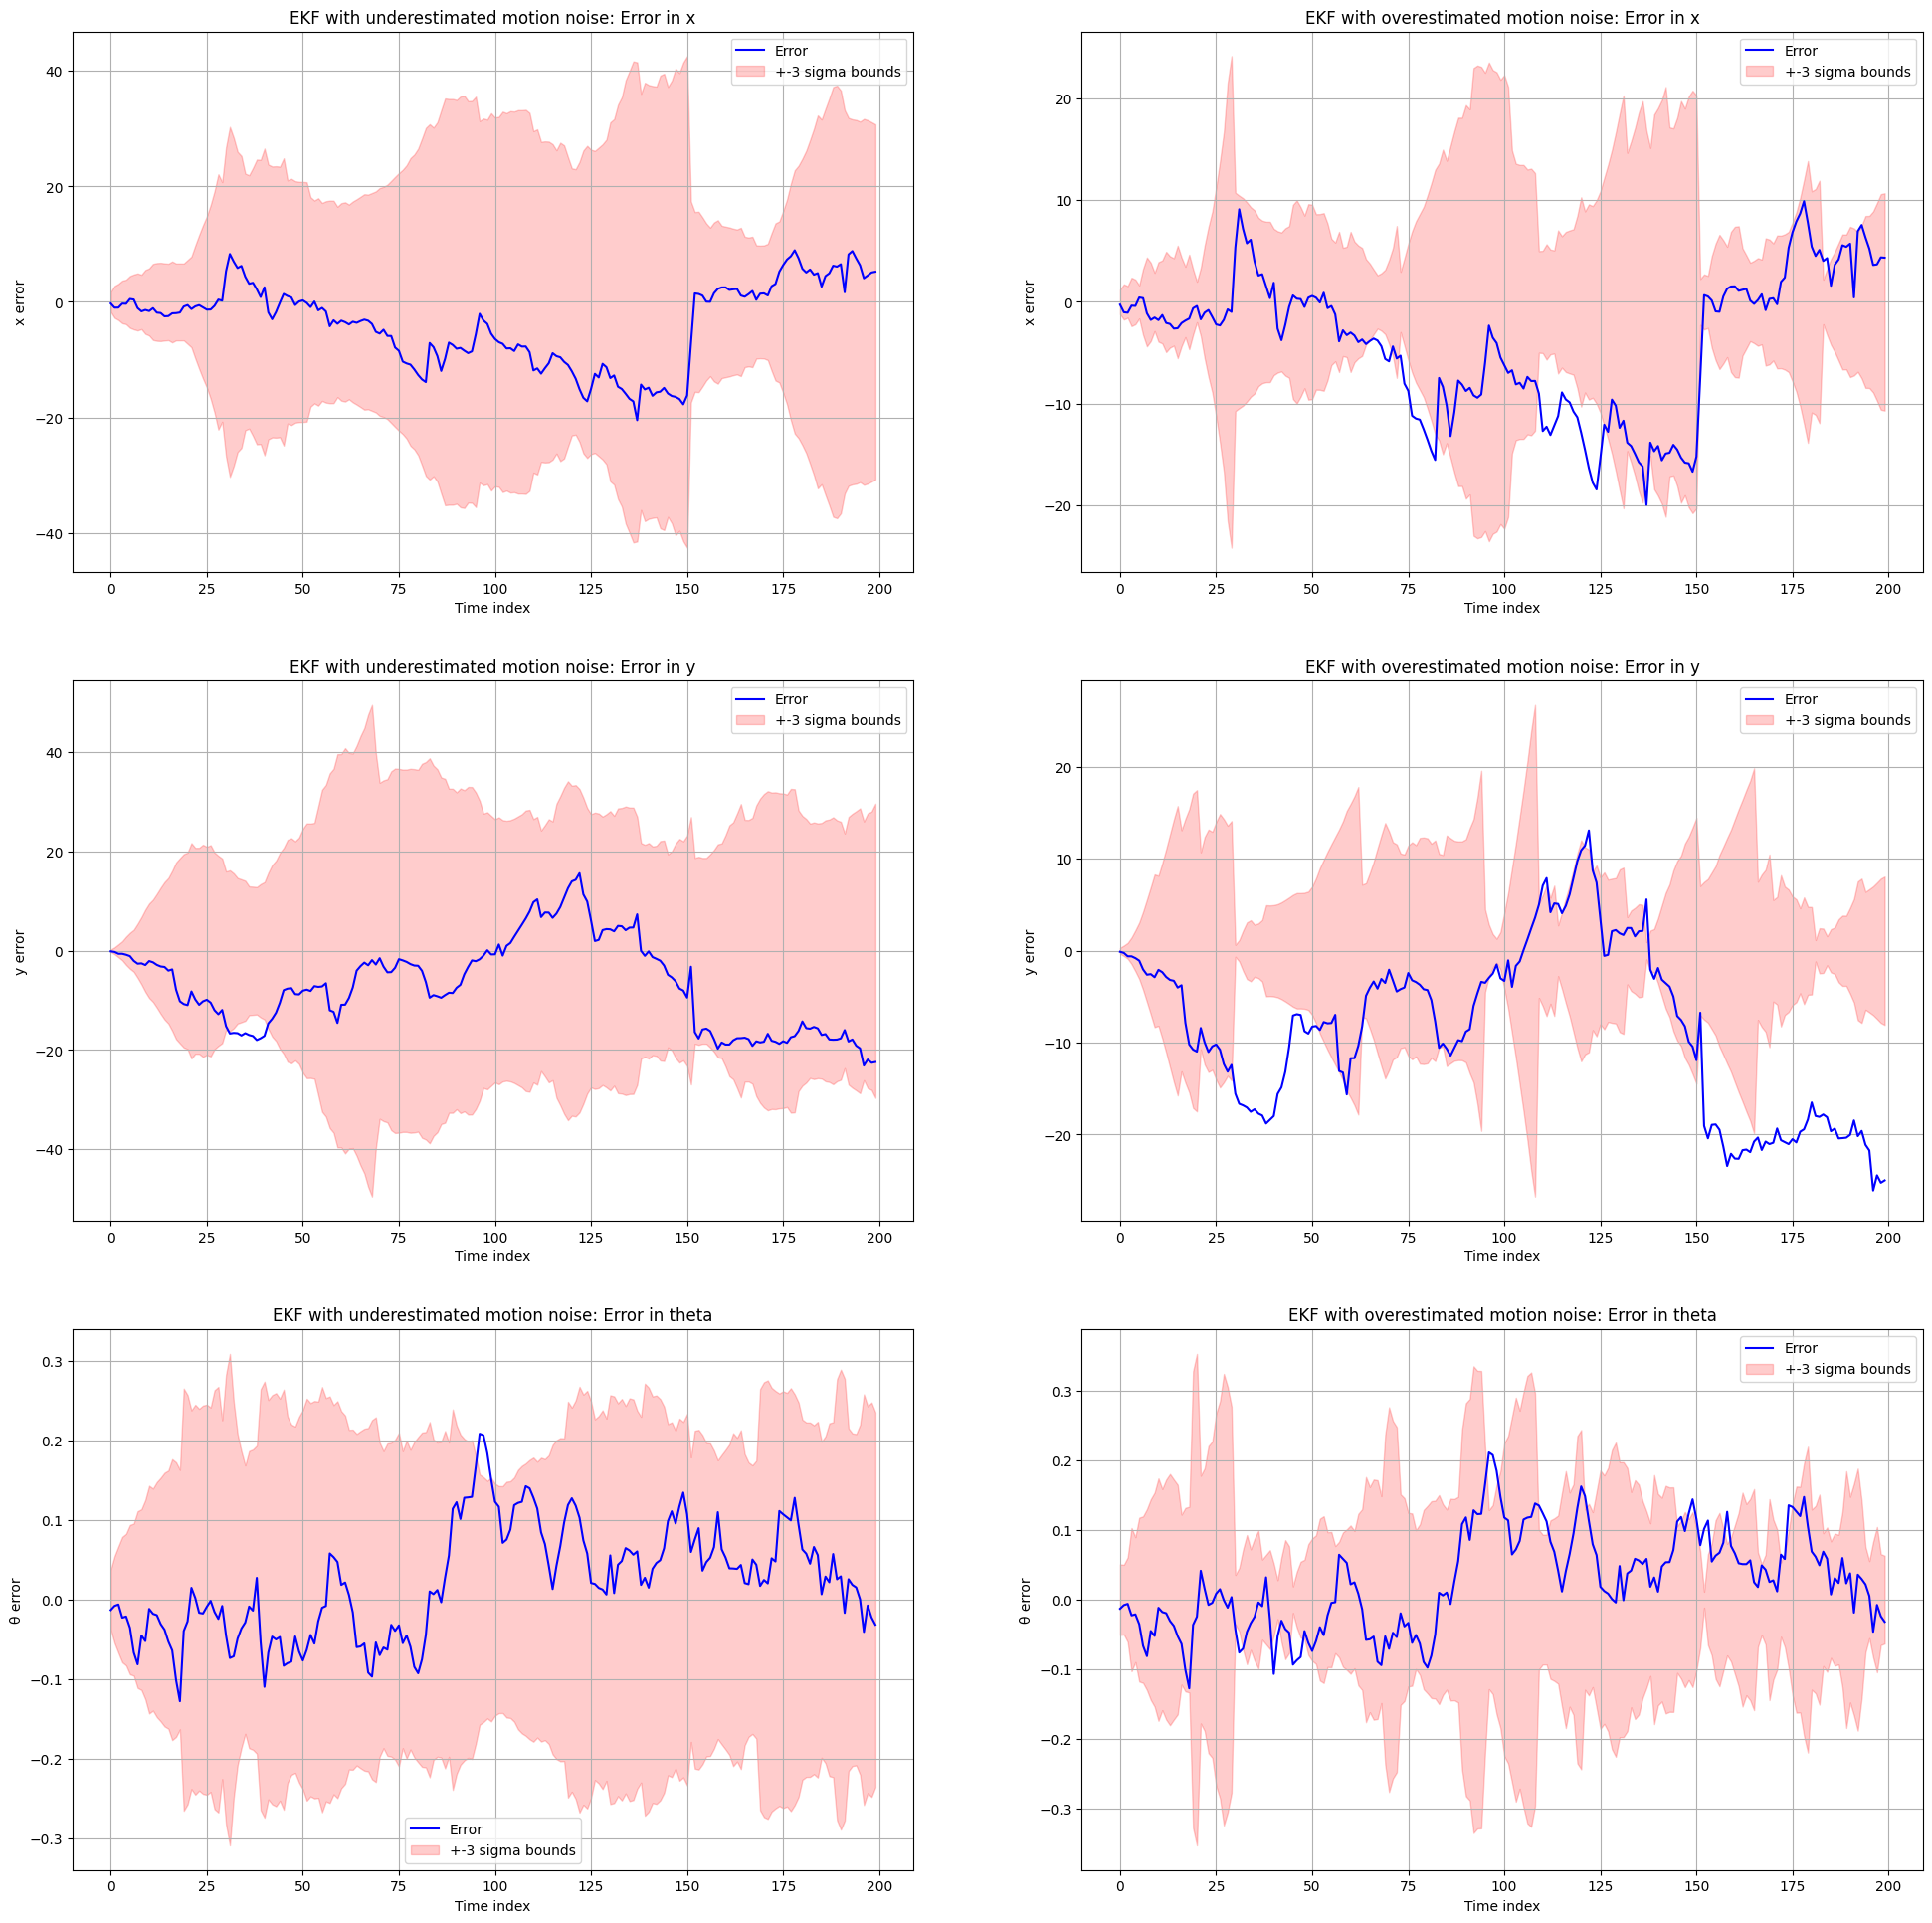

In [9]:
ekf_underestimates_input= np.load('ekf_underestimate/input_data.npy')
ekf_underestimates_output = np.load('ekf_underestimate/output_data.npy')

ekf_overestimates_input = np.load('ekf_overestimate/input_data.npy')
ekf_overestimates_output = np.load('ekf_overestimate/output_data.npy')


real_path_ekf_underestimates = ekf_underestimates_input['real_robot_path']
real_path_ekf_overestimates = ekf_overestimates_input['real_robot_path']

mean_path_ekf_underestimates = ekf_underestimates_output['mean_trajectory']
mean_path_ekf_overestimates = ekf_overestimates_output['mean_trajectory']

cov_path_ekf_underestimates = ekf_underestimates_output['covariance_trajectory']
cov_path_ekf_overestimates = ekf_overestimates_output['covariance_trajectory']

n_ekf_steps_underestimates = ekf_underestimates_input['num_steps']
n_ekf_steps_overestimates = ekf_overestimates_input['num_steps']

error_ekf_underestimates = real_path_ekf_underestimates - mean_path_ekf_underestimates
error_ekf_overestimates = real_path_ekf_overestimates - mean_path_ekf_overestimates

for i in range(len(error_ekf_underestimates)):
    error_ekf_underestimates[i, 2] = wrap_angle(error_ekf_underestimates[i, 2])

for i in range(len(error_ekf_overestimates)):
    error_ekf_overestimates[i, 2] = wrap_angle(error_ekf_overestimates[i, 2])

sigma_ekf_underestimates = np.sqrt(np.diagonal(cov_path_ekf_underestimates, axis1=0, axis2=1))
sigma_ekf_overestimates = np.sqrt(np.diagonal(cov_path_ekf_overestimates, axis1=0, axis2=1))

time_ekf_underestimates = np.arange(n_ekf_steps_underestimates)
time_ekf_overestimates = np.arange(n_ekf_steps_overestimates)

fig, axs = plt.subplots(3, 2, figsize=(24, 24))

titles = ['Error in x', 'Error in y', 'Error in theta']
y_labels = ['x error', 'y error', 'θ error']

for i in range(3):
    axs[i, 0].set_title(f'EKF with underestimated motion noise: {titles[i]}')
    axs[i, 0].plot(time_ekf_underestimates, error_ekf_underestimates[:, i], color='b', label='Error')
    axs[i, 0].fill_between(time_pf_50, -3 * sigma_pf_50[:, i], 3 * sigma_pf_50[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 0].set_xlabel('Time index')
    axs[i, 0].set_ylabel(y_labels[i])
    axs[i, 0].grid()
    axs[i, 0].legend()

    axs[i, 1].set_title(f'EKF with overestimated motion noise: {titles[i]}')
    axs[i, 1].plot(time_ekf_overestimates, error_ekf_overestimates[:, i], color='b', label='Error')
    axs[i, 1].fill_between(time_pf_5, -3 * sigma_pf_5[:, i], 3 * sigma_pf_5[:, i], color='r', alpha=0.2, label='+-3 sigma bounds')
    axs[i, 1].set_xlabel('Time index')
    axs[i, 1].set_ylabel(y_labels[i])
    axs[i, 1].grid()
    axs[i, 1].legend()

Thoughts: When the filter underestimates noise, it might start to feel a bit overconfident, even if the actual numbers are a bit off. You can see this in the graphs on the left. The uncertainty bounds (the red area) are pretty tight, but the errors (the blue line) often go a bit beyond them. It's like the filter is thinking it's super accurate, but it can't always handle things going a bit off course. In the real world, this can make the robot a bit too confident, and it might mess up.

On the other hand, if the noise is overestimated, as in the graphs on the right, the filter starts to account for too much uncertainty. The uncertainty bounds (red area) become wide, and although the errors are mostly within these bounds, the filter itself is less efficient. It can be too "oscillating" and slow to adapt to the real trajectory, which degrades its performance.The takeaway message is this: it's essential to find a healthy balance between the noise parameters. If they're too low, the filter might get a bit too confident, leading to some mistakes. On the other hand, if they're overestimated, it might be too cautious, which can make it slow to adapt to changes. The best balance is somewhere in the middle.